In [15]:
import math
from pomegranate import *
guest = DiscreteDistribution({"A":1/3,"B":1/3,"C":1/3})
prize = DiscreteDistribution({"A":1/3,"B":1/3,"C":1/3})
monty =ConditionalProbabilityTable( [[ 'A',
'A', 'A', 0.0 ],
[ 'A', 'A', 'B', 0.5 ],
[ 'A', 'A', 'C', 0.5 ],
[ 'A', 'B', 'A', 0.0 ],
[ 'A', 'B', 'B', 0.0 ],
[ 'A', 'B', 'C', 1.0 ],
[ 'A', 'C', 'A', 0.0 ],
[ 'A', 'C', 'B', 1.0 ],
[ 'A', 'C', 'C', 0.0 ],
[ 'B', 'A', 'A', 0.0 ],
[ 'B', 'A', 'B', 0.0 ],
[ 'B', 'A', 'C', 1.0 ],
[ 'B', 'B', 'A', 0.5 ],
[ 'B', 'B', 'B', 0.0 ],
[ 'B', 'B', 'C', 0.5 ],
[ 'B', 'C', 'A', 1.0 ],
[ 'B', 'C', 'B', 0.0 ],
[ 'B', 'C', 'C', 0.0 ],
[ 'C', 'A', 'A', 0.0 ],
[ 'C', 'A', 'B', 1.0 ],
[ 'C', 'A', 'C', 0.0 ],
[ 'C', 'B', 'A', 1.0 ],
[ 'C', 'B', 'B', 0.0 ],
[ 'C', 'B', 'C', 0.0 ],
[ 'C', 'C', 'A', 0.5 ],
[ 'C', 'C', 'B', 0.5 ],
[ 'C', 'C', 'C', 0.0 ]], [guest, prize] )

d1 = State(guest,name="guest")
d2 = State(prize,name="prize")
d3 = State(monty,name="monty")
network = BayesianNetwork("Monty Hall Problem")
network.add_states(d1,d2,d3)
network.add_edge(d1,d3)
network.add_edge(d2,d3)
network.bake()
network.predict_proba({'guest':'A','prize':'B'})

array(['A', 'B', {
                     "class" : "Distribution",
                     "dtype" : "str",
                     "name" : "DiscreteDistribution",
                     "parameters" : [
                         {
                             "A" : 0.0,
                             "B" : 0.0,
                             "C" : 1.0
                         }
                     ],
                     "frozen" : false
                 }                                   ], dtype=object)

In [80]:
from pomegranate import *
burglary = DiscreteDistribution({'True': 0.001, 'False': 0.999})
earthquake = DiscreteDistribution({'True': 0.002, 'False': 0.998})
alarm = ConditionalProbabilityTable(
[['True','True','True',0.95],
 ['True', 'True', 'False', 0.05],
['True', 'False', 'True', 0.94],
['True', 'False', 'False', 0.06],
['False', 'True', 'True', 0.29],
['False', 'True', 'False', 0.71],
['False', 'False', 'True', 0.001],
['False', 'False', 'False', 0.999]],
[burglary, earthquake]
)
david_calls = ConditionalProbabilityTable(
[['True', 'True', 0.9],
['True', 'False', 0.1],
['False', 'True', 0.05],
['False', 'False', 0.95]],
[alarm]
)
sophia_calls = ConditionalProbabilityTable(
[['True', 'True', 0.7],
['True', 'False', 0.3],
['False', 'True', 0.01],
['False', 'False', 0.99]],
[alarm]
)
# Define the nodes
s1 = State(burglary, name="burglary")
s2 = State(earthquake, name="earthquake")
s3 = State(alarm, name="alarm")
s4 = State(david_calls, name="david_calls")
s5 = State(sophia_calls, name="sophia_calls")
# Create the Bayesian network
network = BayesianNetwork("Burglary Alarm")
network.add_states(s1, s2, s3, s4, s5)
network.add_edge(s1, s3)
network.add_edge(s2, s3)
network.add_edge(s3, s4)
network.add_edge(s3, s5)
network.bake()
# Calculate the probability of the alarm given burglary
prob_alarm_given_burglary = network.predict_proba({'burglary': 'False'})[2].parameters[0]['True']
print("Probability of Alarm given Burglary:", prob_alarm_given_burglary)

Probability of Alarm given Burglary: 0.0015780000000007283


In [81]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

model = BayesianNetwork([('Earthquake','Alarm'),('Burglary','Alarm')
                        ,('Alarm','David'),('Alarm','Sophia')])

earthquake_cpd = TabularCPD(variable='Earthquake',variable_card=2,
                           values = [[0.002],[0.998]],state_names={'Earthquake':['True','False']})

burglary_cpd = TabularCPD(variable = 'Burglary',variable_card = 2,
                         values = [[0.001],[0.999]],state_names={'Burglary':['True','False']})

alarm_cpd = TabularCPD(variable='Alarm',variable_card = 2,
                      values=[[0.95,0.94,0.29,0.001],
                             [0.05,0.06,0.71,0.999]],
                      evidence = ['Burglary','Earthquake'],
                      evidence_card=[2,2],
                      state_names={
                          'Alarm':['Yes','No'],
                          'Burglary':['True','False'],
                          'Earthquake':['True','False']
                      })

david_cpd = TabularCPD(variable='David',
                      variable_card = 2,
                      values = [[0.9,0.05],
                                [0.1,0.95]],
                       evidence=['Alarm'],
                      evidence_card = [2],
                      state_names = {
                          'David':['Yes','No'],
                          'Alarm':['Yes','No']
                      })



sophia_cpd = TabularCPD(variable='Sophia',
                       variable_card = 2,
                       values = [[0.7,0.01],[0.3,0.99]],
                       evidence = ['Alarm'],
                       evidence_card=[2],
                       state_names = {
                           'Sophia':['Yes','No'],
                           'Alarm':['Yes','No']
                       })
model.add_cpds(earthquake_cpd,burglary_cpd,alarm_cpd,david_cpd,sophia_cpd)
assert model.check_model()
inference = VariableElimination(model)

result = inference.query(variables=['Alarm'],evidence = {'Burglary':'True'})
print(result)

+------------+--------------+
| Alarm      |   phi(Alarm) |
+============+==============+
| Alarm(Yes) |       0.9400 |
+------------+--------------+
| Alarm(No)  |       0.0600 |
+------------+--------------+


In [82]:
from pgmpy.models import *
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
model = BayesianNetwork([("StudyTime","Performance"),
                         ("Tutoring","Performance")])
cpd_StudyTime = TabularCPD(variable="StudyTime",variable_card=3,
                           values=[[0.2],[0.3],[0.5]],state_names={"StudyTime":["Low","Medium","High"]})
cpd_Tutoring = TabularCPD(variable="Tutoring",variable_card=2,
                           values=[[0.7],[0.3]],state_names={"Tutoring":["Yes","No"]})
cpd_performance = TabularCPD(variable='Performance', variable_card=3,
                              values=[[0.3,0.6,0.2,0.4,0.1,0.2],
                                      [0.3,0.2,0.5,0.3,0.3,0.5],
                                      [0.4,0.2,0.3,0.3,0.6,0.3]],
                              evidence=['StudyTime', 'Tutoring'], evidence_card=[3, 2],
                              state_names={"Performance":["Poor","Average","Good"],
                                  "StudyTime":["Low","Medium","High"],"Tutoring":["Yes","No"]})

model.add_cpds(cpd_StudyTime,cpd_Tutoring,cpd_performance)
infer = VariableElimination(model)
res_1 = infer.query(variables=["Performance"],evidence={'StudyTime':"Medium","Tutoring" :"Yes"})
res_2 = infer.query(variables=['StudyTime',"Tutoring"],evidence={'Performance':'Good'})
res_3 = infer.query(variables=['StudyTime', 'Tutoring'], evidence={'Performance': "Average"})
print("Prob of poor performance,given medium study time and tutor: ",res_1.values[0])
print(res_1)
print("Prob of study time and tutor ,given good performance: ",res_2)
print("Prob of study time and tutoring, given average performance: ",res_3)




Prob of poor performance,given medium study time and tutor:  0.2
+----------------------+--------------------+
| Performance          |   phi(Performance) |
+======================+====================+
| Performance(Poor)    |             0.2000 |
+----------------------+--------------------+
| Performance(Average) |             0.5000 |
+----------------------+--------------------+
| Performance(Good)    |             0.3000 |
+----------------------+--------------------+
Prob of study time and tutor ,given good performance:  +-------------------+---------------+---------------------------+
| StudyTime         | Tutoring      |   phi(StudyTime,Tutoring) |
+===================+===============+===========================+
| StudyTime(Low)    | Tutoring(Yes) |                    0.1356 |
+-------------------+---------------+---------------------------+
| StudyTime(Low)    | Tutoring(No)  |                    0.0291 |
+-------------------+---------------+---------------------------+
| St

# HMM 

Using a Hidden Markov Model, diagnose whether a person is healthy or sick based on the observation of
cough or no cough. The model has two possible states: healthy and sick, and two possible observations: cough
and no cough.

In [20]:
from hmmlearn import hmm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

states = ['Healthy','Sick']
n_states = 2
observations = ['No Cough','Cough']
state_prob = np.array([0.8,0.2])
transition_prob = np.array([[0.6,0.4],[0.4,0.6]])
emission_prob = np.array([[0.5,0.5],[0.8,0.2]])
model = hmm.CategoricalHMM(2)
model.startprob_ = state_prob
model.transmat_ = transition_prob
model.emissionprob_ = emission_prob
observations_sequence = np.array([0,1,0,0]).reshape(-1,1)
hidden_states = model.predict(observations_sequence)
for i in hidden_states:
    print(states[i],end=' ')

Healthy Healthy Sick Sick 

In [26]:
states = ['Healthy','Sick','Recovering']
n_states = 3
observations = ['No Cough','Mild Cough','Severe Cough']
state_prob = np.array([0.6,0.3,0.1])
transition_prob = np.array([[0.7,0.2,0.1],
                            [0.1,0.7,0.2],
                            [0.5,0.1,0.4]])
emission_prob = np.array([[0.8,0.15,0.05],
                         [0.1,0.3,0.6],
                         [0.3,0.6,0.1]])
model = hmm.CategoricalHMM(3)
model.startprob_ = state_prob
model.transmat_ = transition_prob
model.emissionprob_ = emission_prob
observation_sequence = np.array([1,2,0]).reshape(-1,1)
hidden_states = model.predict(observation_sequence)
for i in hidden_states:
    print(states[i],end=" ")

Sick Sick Healthy 

In [83]:
#Probability of Plans
Plan1 = 0.3
Plan2 = 0.2
Plan3 = 0.5
#Conditional Probs
PD_Given_1 = 0.01
PD_Given_2 = 0.03
PD_Given_3 = 0.02
Defective = (PD_Given_1*Plan1)+(PD_Given_2*Plan2)+(PD_Given_3*Plan3)

#Using Bayes Rule to Calculate Probs
P1_Given_D = (PD_Given_1*Plan1)/Defective
P2_Given_D = (PD_Given_2*Plan2)/Defective
P3_Given_D = (PD_Given_3*Plan3)/Defective

P1_Given_D = np.round(P1_Given_D,3)
P2_Given_D = np.round(P2_Given_D,3)
P3_Given_D = np.round(P3_Given_D,3)
print("Probability of using Plan 1 given that the product is defective:",P1_Given_D)
print("Probability of using Plan 2 given that the product is defective:",P2_Given_D)
print("Probability of using Plan 3 given that the product is defective:",P3_Given_D)

most_likely = max(P1_Given_D,P2_Given_D,P3_Given_D)
if most_likely==P1_Given_D:
    print("Plan 1 was most likely used since it has the highest probability")
elif most_likely==P2_Given_D:
    print("Plan 2 was most likely used since it has the highest probability")
else:
    print("Plan 3 was most likely used since it has the highest probability")

Probability of using Plan 1 given that the product is defective: 0.158
Probability of using Plan 2 given that the product is defective: 0.316
Probability of using Plan 3 given that the product is defective: 0.526
Plan 3 was most likely used since it has the highest probability


In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error

In [55]:
iris = load_iris()
X = iris.data
y = iris.target
print(iris.feature_names)
df = pd.DataFrame(X)
df.columns = iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [56]:
df['target'] = y

In [57]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42) 

In [70]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X_train,y_train)

SVC(kernel='linear')

In [73]:
pred = model.predict(X_test) # target_hat

In [77]:
print(pred)
print(y_test)
score = accuracy_score(pred,y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [79]:
score*100

100.0

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

cancer = load_breast_cancer()
X,y = cancer.data,cancer.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
labels={0:'Malignant',1:'Benign'}
y_labels= []
for i in y_pred:
    y_labels.append(labels[i])
accuracy = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
print("Accuracy (Logistic Regression):",accuracy)
print("Confusion Matrix: ",conf)
print("Predictions for cancer diagnosis (Malignant or Benign):")
print(y_labels)

Accuracy (Logistic Regression): 0.956140350877193
Confusion Matrix:  [[39  4]
 [ 1 70]]
Predictions for cancer diagnosis (Malignant or Benign):
['Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Be

In [85]:
#Sir The boston dataset has been removed from the scikit learn
#library so i am using california dataset
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error,mean_squared_error

california = fetch_california_housing()
X,y = california.data,california.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error (MSE):",mse)
print("Mean Absolute Error (MAE):",mae)

Mean Squared Error (MSE): 0.5558915986952422
Mean Absolute Error (MAE): 0.5332001304956998


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


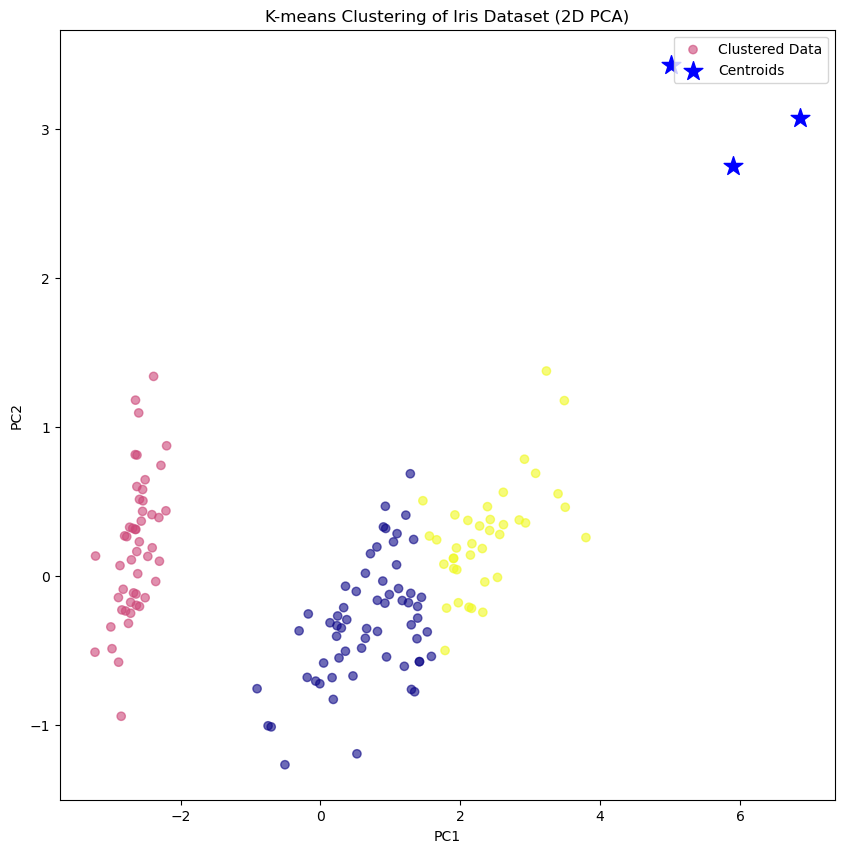

In [86]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = load_iris()
X,y=iris.data,iris.target

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)

y_pred = kmeans.predict(X)

#I am converting data to 2D by using PCA for visualization
pca = PCA(n_components=2)
Ypca = pca.fit_transform(X)

plt.figure(figsize=(10,10))
plt.scatter(Ypca[:,0],Ypca[:,1],c=y_pred,cmap='plasma',alpha=0.6,label="Clustered Data")
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=200,c='blue',marker='*',label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering of Iris Dataset (2D PCA)')
plt.legend()
plt.show()

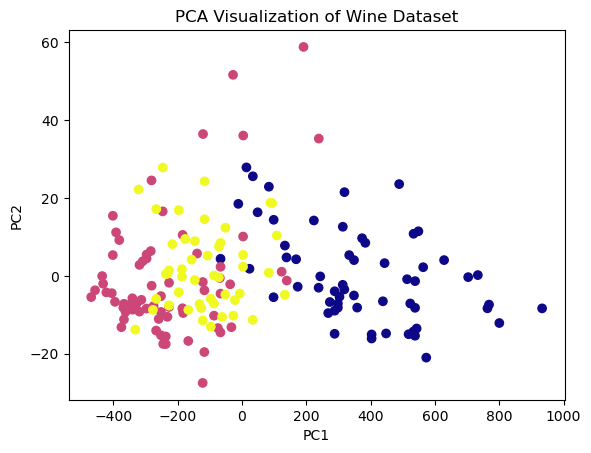

In [87]:
from sklearn.datasets import load_wine
wine = load_wine()
X,y = wine.data,wine.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma')
plt.title("PCA Visualization of Wine Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()